# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

## 1.1 Create a two-dimensional vector and plot it on a graph

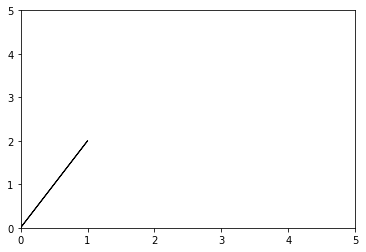

In [42]:
import numpy as np
import matplotlib.pyplot as plt

v = (1, 2)
plt.arrow(0, 0, v[0], v[1])
plt.ylim(0, 5)
plt.xlim(0, 5)
plt.show()

## 1.2 Create a three-dimensional vecor and plot it on a graph

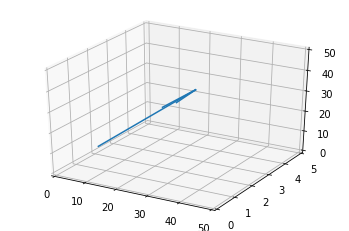

In [17]:
from mpl_toolkits.mplot3d import Axes3D

X, Y, Z, U, V, W = 1, 2, 3, 4, 5, 6
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim(0, 50)
ax.set_ylim(0, 5)
ax.set_zlim(0, 50)
plt.show()

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

In [18]:
from math import e, pi
print(e)
print(pi)

2.718281828459045
3.141592653589793


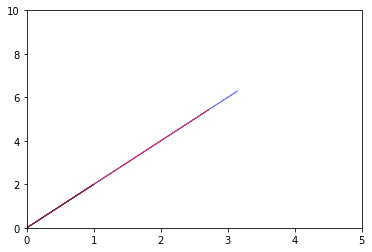

In [48]:
plt.arrow(0, 0, v[0], v[1], alpha=0.5)

v5 = v * 5
plt.arrow(0, 0, v5[0], v5[1], color='g', alpha=0.5)

vpi = ((v[0]*pi), (v[1]*pi))
plt.arrow(0, 0, vpi[0], vpi[1], color='b', alpha=0.5)

ve = ((v[0]*e), (v[1]*e))
plt.arrow(0, 0, ve[0], ve[1], color='r', alpha=0.5)

plt.ylim(0, 10)
plt.xlim(0, 5)

plt.show()

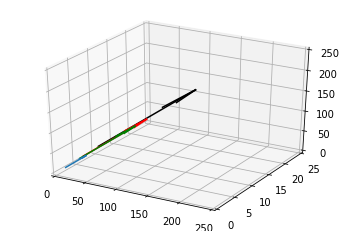

In [32]:
X, Y, Z, U, V, W = 1, 2, 3, 4, 5, 6
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)

ax.quiver(X*5, Y*5, Z*5, U*5, V*5, W*5, color='K')

ax.quiver(X*pi, Y*pi, Z*pi, U*pi, V*pi, W*pi, color='r')

ax.quiver(X*e, Y*e, Z*e, U*e, V*e, W*e, color='g')

ax.set_xlim(0, 250)
ax.set_ylim(0, 25)
ax.set_zlim(0, 250)
plt.show()

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

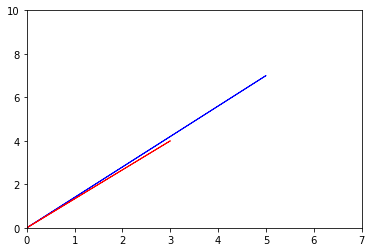

In [52]:
plt.arrow(0, 0, 5, 7, color='b')
plt.arrow(0,0, 3, 4, color='r')
plt.ylim(0, 10)
plt.xlim(0, 7)
plt.show()

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

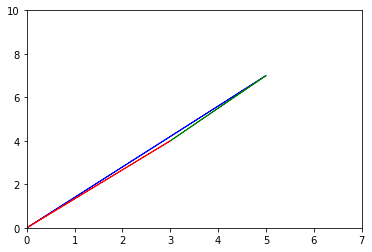

In [57]:
plt.arrow(0, 0, 5, 7, color='b')
plt.arrow(0,0, 3, 4, color='r')
plt.arrow(3, 4, 2, 3, color='g')
plt.ylim(0, 10)
plt.xlim(0, 7)
plt.show()

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [0]:
#you can't multiply things like that. the number of columns in the first one has to match the number of rows in the second

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [64]:
e = np.array([[5], [7], [2]])
f = np.array([[3], [4], [6]])
np.cross(e, f)

ValueError: ignored

## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [59]:
g = [1, 1, 1, 8]
h = [3, 3, 3, 3]
print(np.linalg.norm(g))
print(np.linalg.norm(h))
#g is longer

8.18535277187245
6.0


# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [0]:
# A: 3x2, B: 1x3, C: 2x3, D: 3x3, E: 2x2
# A*C, A*E, B*A, B*D, C*A, C*D, D*A, E*C 

## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [61]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([2, 4, 6])
C = np.array([[9, 6, 3], [4, 7, 11]])
D = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
E = np.array([[1, 3], [5, 7]])

print(np.matmul(C, D))
print(np.matmul(A, E))
print(np.matmul(B, A))

[[ 9  6  3]
 [ 4  7 11]]
[[11 17]
 [23 37]
 [35 57]]
[44 56]


In [0]:
# CD: 2x3, AE: 3x2, BA: 2x1
#when you multiply 2 matrices together, the inner dimensions must match and the outer dimensions become the dimensions of the new matrix

## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [62]:
F = np.array([[20, 19, 18, 17], [16, 15, 14, 13], [12, 11, 10, 9], [8, 7, 6, 5], [4, 3, 2, 1]])
print(np.matrix.transpose(F))
#they will have the same diagonal. the dimensions respectively are 5x4 and 4x5

[[20 16 12  8  4]
 [19 15 11  7  3]
 [18 14 10  6  2]
 [17 13  9  5  1]]


# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [63]:
I = np.array([[1, 0], [0, 1]])
G = np.array([[12, 11], [7, 10]])
np.matmul(I, G)

array([[12, 11],
       [ 7, 10]])

## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [65]:
H = G
J = np.array([[0, 1, 2], [7, 10, 4], [3, 2, 0]])
print(np.linalg.det(H))
print(np.linalg.det(J))

43.000000000000014
-19.999999999999996


## 3.3 Find $H^{-1}$ and then find $J^{-1}$

In [66]:
print(np.linalg.inv(H))
print(np.linalg.inv(J))

[[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]]
[[ 0.4  -0.2   0.8 ]
 [-0.6   0.3  -0.7 ]
 [ 0.8  -0.15  0.35]]


## 3.4 Find $HH^{-1}$ and then find $J^{-1}J$. Is $HH^{-1} == J^{-1}J$? Why or Why not?

In [0]:
#  Those are both gonna end up being the identity matrix. that is the definition of an inverse matrix.

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?

